# Online Retail Dataset - Customer Segmentation

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**Attribute Information:**

- **InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- **StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- **Description**: Product (item) name. Nominal.
- **Quantity**: The quantities of each product (item) per transaction. Numeric.
- **InvoiceDate**: Invoice Date and time. Numeric, the day and time when each transaction was generated.
- **UnitPrice**: Unit price. Numeric, Product price per unit in sterling.
- **CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- **Country**: Country name. Nominal, the name of the country where each customer resides. 

**Dataset source**

https://drive.google.com/file/d/1d8Jye3kpb09d5dpckf33jePp25h56wf-/view?usp=sharing

### **The Structure of the notebook:**

1. Imports
2. Data
3. Basic EDA
    1. Missing values
4. Data Preprocessing
    1. Removing the missing values
    2. Checking for duplicate rows
    3. Outliers
5. RFM Analysis
    1. Recency
    2. Frequency
    3. Monetary Value
    4. RFM Segmentation using scores
    5. Visualizing the RFM Level customers using a bar plot
6. Clustering products into product categories
    1. The Elbow Method
    2. Visualizing the clusters
7. Customer Segmentation using Unsupervised Learning
    1. PCA
    2. K-Means Clustering
8. Understanding Clusters


### Potential Actions:

* RFM Analysis
* Feature engineering
* Product Categorization
* PCA (factor analysis prior?)
* Create clusters of customers

## RFM Analysis

RFM (Recency, Frequency, Monetary) Analysis is a customer segmentation technique used in marketing and customer analytics to analyze and categorize customers based on their buying behavior. The analysis groups customers into different categories based on the Recency (how recently they made a purchase), Frequency (how often they make a purchase), and Monetary Value (how much they spend) of their transactions. The information obtained through RFM analysis is used to develop targeted marketing campaigns and improve customer retention and acquisition strategies.

- **Recency**: Calculate the number of days between the most recent transaction and the current date to determine the Recency of each customer.

- **Frequency**: Calculate the number of transactions each customer has made to determine their Frequency score.

- **Monetary Value**: Calculate the total amount spent by each customer to determine their Monetary Value score.

- **Assign RFM scores**: Combine the Recency, Frequency, and Monetary Value scores to assign each customer an overall RFM score.

- **Segment customers**: Group customers into different segments based on their RFM score, with higher scores indicating more valuable customers. For example, "Best Customers", "Loyal Customers", "Big Spenders", etc.

## Segmenting customers using Unsupervised learning

## Feature Engineering potenitals

- Recency: Calculate the number of days since each customer's last purchase to capture how recently they have been active.

- Frequency: Calculate the number of purchases made by each customer to capture how frequently they make purchases.

- Monetary Value: Calculate the total amount spent by each customer by multiplying the quantity of items purchased by the unit price.

- Product Category: Group the items purchased by each customer into different product categories based on the Description feature.

- Customer Segment: Use market basket analysis or association rule mining to identify common patterns in the items purchased by customers, and group customers into different segments based on these patterns.

## Clustering products into product categories using NLP

- Tokenize the text: Split the product names or descriptions into individual words (tokens). This will allow you to analyze the content of the text.

- Remove stop words: Remove common words that carry little meaning, such as "the", "and", "of", etc.

- Perform stemming or lemmatization: Reduce the words to their root form to reduce the dimensionality of the data. For example, "running", "runner", and "ran" would all be reduced to the root form "run".

- Perform word frequency analysis: Calculate the frequency of each word in the product names or descriptions.

- Perform dimensionality reduction: Use techniques such as TF-IDF (Term Frequency-Inverse Document Frequency) or PCA (Principal Component Analysis) to reduce the number of features while retaining as much information as possible.

- Cluster the reduced features: Use a clustering algorithm, such as K-means, to group the product names or descriptions into different categories based on their content. 

## Imports 

In [3]:
#basic libraries for linear algebra and data procesing
import numpy as np
import pandas as pd
# Install missingno first
!pip install missingno
# Install yellowbrick first
!pip install yellowbrick
import missingno as msno
from datetime import datetime, timedelta

#visualization
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

#nlp
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

#modeling
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#time and warnings
import time
import warnings

#settings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_context('poster', font_scale=0.5)

# Data

In [5]:
#loading data

retail = pd.read_excel(r"C:\Users\Lenovo\Downloads\Dataset_Identify customer segments for online retail with the use of K-means clustering\Online Retail.xlsx")

# Basic EDA

In [6]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [8]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
retail.value_counts('Country')

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [10]:
retail.value_counts('InvoiceNo')

InvoiceNo
573585    1114
581219     749
581492     731
580729     721
558475     705
          ... 
557509       1
540264       1
540272       1
557501       1
569420       1
Name: count, Length: 25900, dtype: int64

In [11]:
retail.value_counts('CustomerID')

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
14119.0       1
13747.0       1
15590.0       1
15562.0       1
17925.0       1
Name: count, Length: 4372, dtype: int64

In [12]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# Missing Values

In [13]:
#exploring the number of missing values per feature in percentage
print('Number of missing values: ', retail.isnull().values.sum())
print('Percent of missing values per feature: ') 
retail.isnull().sum() * 100 / len(retail)

Number of missing values:  136534
Percent of missing values per feature: 


InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

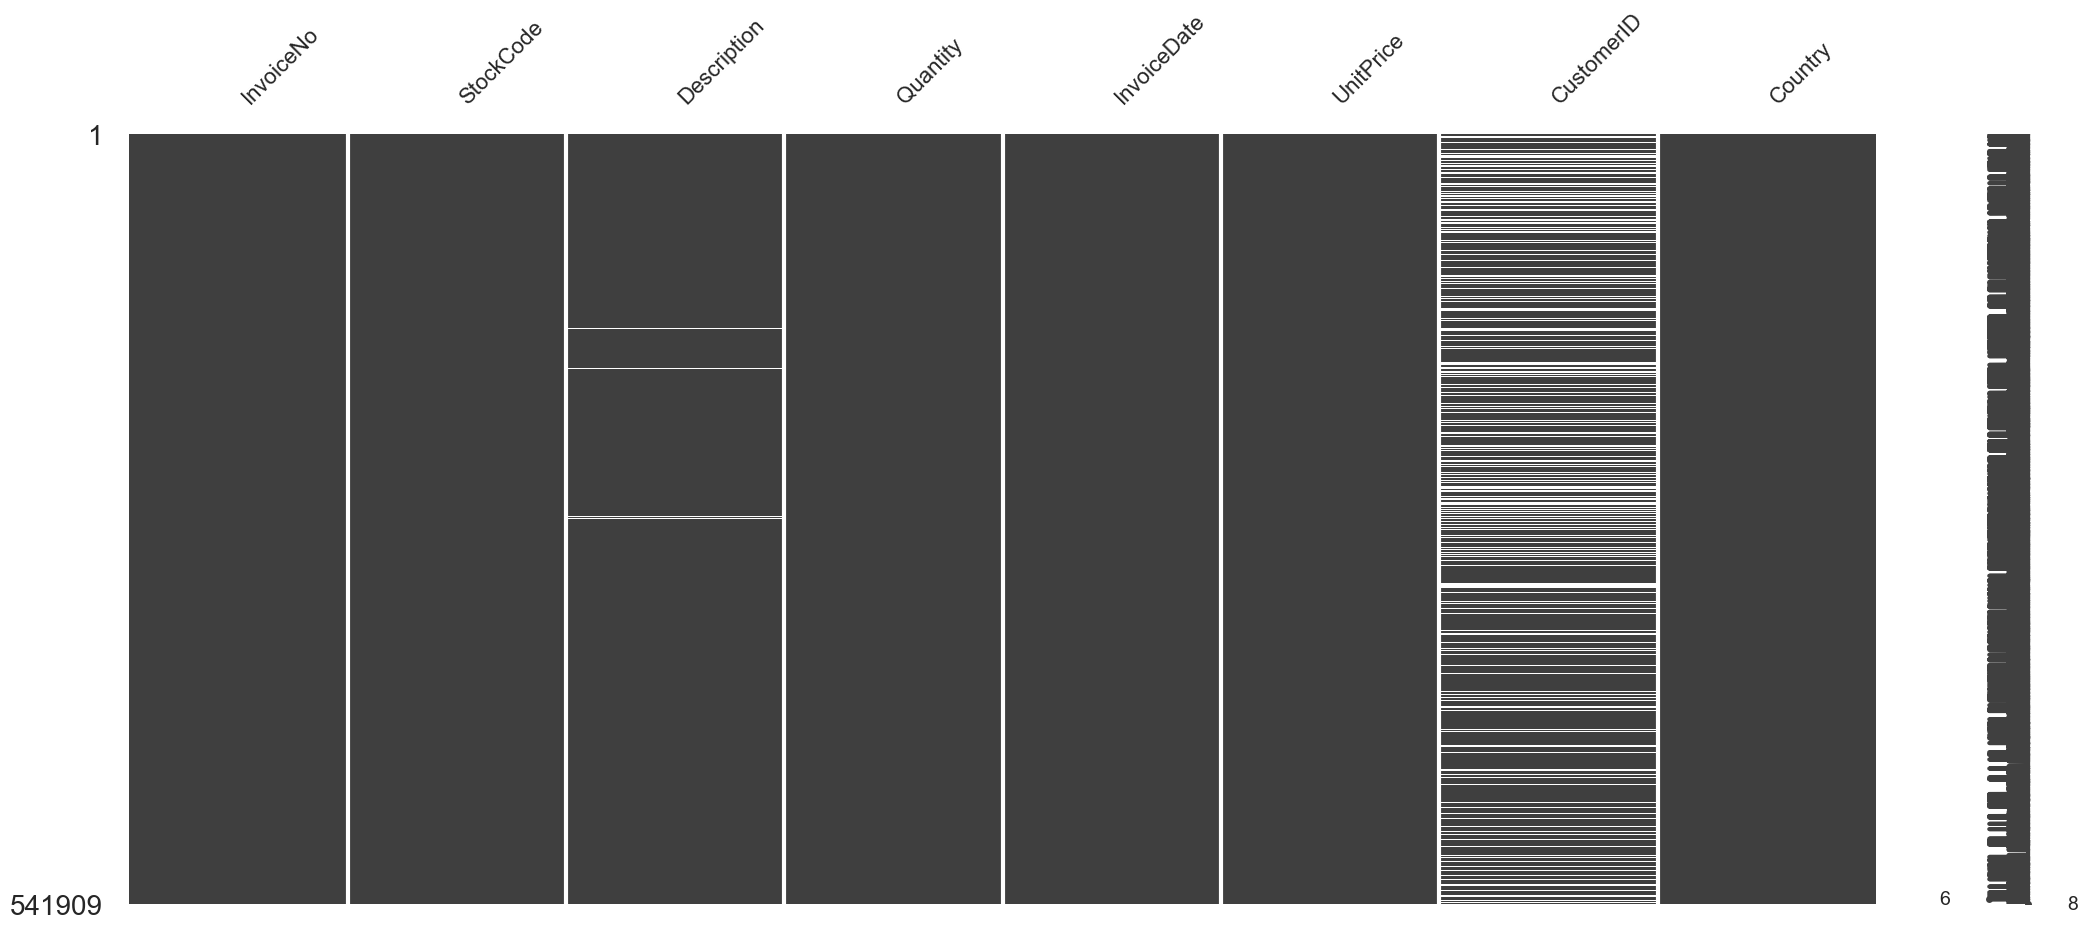

In [14]:
#matrix map of missing values
msno.matrix(retail)
plt.show()

# Data Processing 

### Removing the missing values

About a quarter of Customer ID is missing, ans 0.2% of products. I will proceed with removing all of the rows with missing values as the CustomerID is integral to the analysis, and cannot contain missing values.

In [15]:
#removing missing values
retail.dropna(inplace=True)

In [16]:
#resetting the index
retail.reset_index(drop=True, inplace=True)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [17]:
print('Number of missing values: ', retail.isnull().values.sum())
print('Data lenght: ', len(retail))

Number of missing values:  0
Data lenght:  406829


### Checking for duplicate rows

Duplicates in this case represent a different product bought by the same customer.

In [18]:
duplicates_retail = retail.duplicated()
print(duplicates_retail.sum())

5225


In [19]:
duplicated_row1 = retail[duplicates_retail == True].iloc[0]
print(duplicated_row1)

InvoiceNo                           536409
StockCode                            21866
Description    UNION JACK FLAG LUGGAGE TAG
Quantity                                 1
InvoiceDate            2010-12-01 11:45:00
UnitPrice                             1.25
CustomerID                         17908.0
Country                     United Kingdom
Name: 517, dtype: object


In [20]:
duplicated_row2 = retail[duplicates_retail == True].iloc[1]
print(duplicated_row2)

InvoiceNo                             536409
StockCode                              22866
Description    HAND WARMER SCOTTY DOG DESIGN
Quantity                                   1
InvoiceDate              2010-12-01 11:45:00
UnitPrice                                2.1
CustomerID                           17908.0
Country                       United Kingdom
Name: 527, dtype: object


### Checking for outliers

- **Quantity**
    - There seems to be around 9K rows that have a negative value for quantity. Simultaneously, the rows with negative quantity values have Stock Code and Description Code values such as "D", "M", or "discount", "manual". Quantity value reach a maximum of 80995 - which is a product PAPER CRAFT , LITTLE BIRDIE. I have no reason to suspect it is an invalid entry, however it is a significant outlier.
    - **Potential problems**: As the feature Quantity will be used in feature engineering, how will negative values be calculated as, and will they accurately represent for example monetary worth of a customer? I can only assume negative values stem from returned products by the same customer, however my assumption is not verifiable. However, not regular Description features as well as Stock Code feature seem to match with the negative Quantity values, but it's not always the case. For example there are negative -24 values for product PACK OF 12 PINK PAISLEY TISSUES.
    - **Potential solution**: Remove negative values from the Quantity feature that correspond to the values such as "manual", "discount" in the Description feature, as the Description feature will be used for product categorization.

- **Stock Code**
    - Stock Code contains values such as "M", "D", "POST", "CRUK". As there is no clear explanation as to what these values represent in the dataset description, my assumption is that these values correspond to the fluctuations / changes in product stock. I also see that the Stock Code feature corresponds to the Description feature in terms of "M" matching the "Manual" in Desription feature.
    - **Potential problems**: I do not believe Stock Code feature will be of great value in my project.
    - **Potential solution**: By removing the values in the Desription feature that are not relevant, the corresponding Stock Code values will also be removed.

- **Description**
    - Same as Stock Code, Description contains values that are not product names, such as "Discount", "Manual", "POSTAGE", "CRUK Commission"
    - **Potential problems**: As part of my project, I have decided to categorize products in clusters. In order to do that I need to tokenize and vectorize product names in this feature. Values such as "manual" "discount" "post" do not represent products, nor any potential category.
    - **Potential solution**: Remove all values that do not represent an actual product.
    
- **Unit Price**
    - Unit price reaches a maximum value of 38970 pounds but not for a product. It is a desription "Manual" and Stock Code "M". I filtered Unit Price for all values larger than 1000, and all Desription columns contain values that do not represent products, but rather values as desribed above: "manual", "postage" etc.
    - **Potential problems**: High unit prices might skew with the values of new features such as monetary value of a customer. 
    - **Potential solution**: Onde unwanted values in the Description feature are removed, check if there are still high unit prices, and see if they need to be additionaly removed.

In [21]:
retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [22]:
retail[retail['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
406377,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
406461,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
406635,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
406636,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [23]:
retail[retail['Quantity'] > 1000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
3645,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
3740,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
3741,536830,21915,RED HARMONICA IN BOX,1400,2010-12-02 17:38:00,1.06,16754.0,United Kingdom
4286,536890,17084R,ASSORTED INCENSE PACK,1440,2010-12-03 11:48:00,0.16,14156.0,EIRE
10946,537659,22189,CREAM HEART CARD HOLDER,1008,2010-12-07 16:43:00,2.31,18102.0,United Kingdom
...,...,...,...,...,...,...,...,...
402106,581115,22413,METAL SIGN TAKE IT OR LEAVE IT,1404,2011-12-07 12:20:00,2.75,15195.0,United Kingdom
403246,581175,23084,RABBIT NIGHT LIGHT,1440,2011-12-07 15:16:00,1.79,14646.0,Netherlands
405998,581458,22197,POPCORN HOLDER,1500,2011-12-08 18:45:00,0.72,17949.0,United Kingdom
405999,581459,22197,POPCORN HOLDER,1200,2011-12-08 18:46:00,0.72,17949.0,United Kingdom


In [24]:
retail[retail['UnitPrice'] > 1000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
28939,C540271,M,Manual,-1,2011-01-06 11:51:00,1126.00,12503.0,Spain
45380,C542348,M,Manual,-1,2011-01-27 12:09:00,1715.85,12539.0,Spain
78283,C546325,M,Manual,-1,2011-03-11 10:15:00,1687.17,14911.0,EIRE
78284,C546327,M,Manual,-1,2011-03-11 10:18:00,1687.17,14911.0,EIRE
78285,546328,M,Manual,1,2011-03-11 10:19:00,1687.17,14911.0,EIRE
78286,546329,M,Manual,1,2011-03-11 10:22:00,1687.17,14911.0,EIRE
99563,548813,M,Manual,1,2011-04-04 13:03:00,2382.92,12744.0,Singapore
99565,548813,M,Manual,1,2011-04-04 13:03:00,1252.95,12744.0,Singapore
99566,548820,M,Manual,1,2011-04-04 13:04:00,2053.07,12744.0,Singapore
99568,C548830,M,Manual,-1,2011-04-04 13:08:00,2382.92,12744.0,Singapore


In [25]:
# the Description feature
#counting Manual, Discount...
count_manual = (retail['Description'].eq('Manual')).sum()
count_disc = (retail['Description'].eq('Discount')).sum()
count_post = (retail['Description'].eq('POSTAGE')).sum()
count_cruk = (retail['Description'].eq('CRUK Commission')).sum()
count_dot = (retail['Description'].eq('DOTCOM POSTAGE')).sum()

print('Sum of value manual: ', count_manual)
print('Sum of value discount: ', count_disc)
print('Sum of value postage: ', count_post)
print('Sum of value cruk commission: ', count_cruk)
print('Sum of value dotcom postage: ', count_dot)

Sum of value manual:  465
Sum of value discount:  77
Sum of value postage:  1196
Sum of value cruk commission:  16
Sum of value dotcom postage:  16


In [26]:
#the StockCode feature
#finding the count of values that have a len less than 5 (which is a standard stockcode length)

code_less_5_filter = retail['StockCode'].str.len() < 5
code_less_5 = retail[code_less_5_filter]
count_stockcode_less_5 = code_less_5.shape[0]

print("Count of values with length less than 5 in StockCode: {}".format(count_stockcode_less_5))

Count of values with length less than 5 in StockCode: 1908


In [27]:
code_less_5.value_counts('StockCode')

StockCode
POST    1196
M        465
C2       134
D         77
CRUK      16
DOT       16
PADS       4
Name: count, dtype: int64

### Removing unwanted values as per conclusion above

In [28]:
#removing rows with StockCode values that have len less than 5
unwanted_stockcodes = ['POST', 'M', 'C2', 'D', 'CRUK', 'DOT', 'PADS']

mask = ~retail['StockCode'].isin(unwanted_stockcodes)

#keeping the rows with True in the mask
retail = retail[mask]

In [29]:
retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,404921.000000,404921,404921.000000,404921.000000
mean,12.105470,2011-07-10 16:57:49.616344832,2.901451,15295.158048
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13969.000000
50%,5.000000,2011-07-31 12:02:00,1.950000,15159.000000
75%,12.000000,2011-10-20 13:07:00,3.750000,16794.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,249.233858,NaN,4.431232,1710.414161


In [30]:
#checking the unit price feature
retail[retail['UnitPrice'] > 1000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [31]:
#checking the description feature again
count_manual = (retail['Description'].eq('Manual')).sum()
count_disc = (retail['Description'].eq('Discount')).sum()
count_post = (retail['Description'].eq('POSTAGE')).sum()
count_cruk = (retail['Description'].eq('CRUK Commission')).sum()
count_dot = (retail['Description'].eq('DOTCOM POSTAGE')).sum()

print('Sum of value manual: ', count_manual)
print('Sum of value discount: ', count_disc)
print('Sum of value postage: ', count_post)
print('Sum of value cruk commission: ', count_cruk)
print('Sum of value dotcom postage: ', count_dot)

Sum of value manual:  0
Sum of value discount:  0
Sum of value postage:  0
Sum of value cruk commission:  0
Sum of value dotcom postage:  0


In [32]:
#checking the huge negative value in Quantity
retail[retail['Quantity'] < -5000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
3102,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
38125,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
406350,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


In [33]:
#checking the huge positive value in Quantity
retail[retail['Quantity'] > 5000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
38120,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
378894,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
406349,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


### Conclusion

After performing the removal of unwanted values in specific features, it seems there occured an error (rather errors) during a purchase of specific items such as PAPER CRAFT , LITTLE BIRDIE. My assumption in that the customer made a mistake when choosing the quantity of nearly 81K, or they changed their mind and returned the product. Both the purchased quantity, and the returned quantity remain in the dataset. These values have their positive value when the purchase was made, so the total will come up to zero during feature engineering. Therefore, I decided to leave these outliers in the data, unless further analysis shows they need to be removed if my assumptions were incorrect.

# Feature Engineering 

# RFM Analysis

In [34]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [35]:
#converting the date feature to a datetime object
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

### Recency 

In [36]:
#setting the reference date to the end date of the analysis
reference_date = retail['InvoiceDate'].max()

#grouping data by customer and getting the latest purchase date for each customer
grouped = retail.groupby('CustomerID')['InvoiceDate'].max().reset_index()

#calculatingthe recency for each customer by subtracting the most recent purchase date from the reference date
grouped['Recency'] = (reference_date - grouped['InvoiceDate']).dt.days

#merging the recency value to the dataframe
retail = retail.merge(grouped[['CustomerID', 'Recency']], on='CustomerID', how='left')

### Frequency 

In [37]:
#calculating the frequency for each customer by counting the number of purchases
frequency = retail.groupby('CustomerID')['InvoiceNo'].count()

#merging the frequency value to the dataframe
retail = retail.merge(frequency, on='CustomerID', how='left')
retail.rename(columns={'InvoiceNo_x':'InvoiceNo', 'InvoiceNo_y':'Frequency'}, inplace=True)

### Monetary Value 

In [38]:
#calculating the monetary value for each customer 
monetary_value = retail.groupby('CustomerID')['UnitPrice'].sum()

#merging the monetary value to the dataframe
retail = retail.merge(monetary_value, on='CustomerID', how='left')
retail.rename(columns={'UnitPrice_x':'UnitPrice', 'UnitPrice_y':'MonetaryValue'}, inplace=True)

### RFM Segmentation using scores

The customers are grouped into different segments based on their RFM level, and calculate the mean values for recency, frequency, and monetary value for each segment. 
The result I get is a summary table that provides us with valuable insights into the behavior of each segment of customers.

In [39]:
#normalizing the values
r_quartile = pd.qcut(retail['Recency'], 4, labels=[4, 3, 2, 1])
f_quartile = pd.qcut(retail['Frequency'], 4, labels=[1, 2, 3, 4])
m_quartile = pd.qcut(retail['MonetaryValue'], 4, labels=[1, 2, 3, 4])
retail['RFM_Score'] = r_quartile.astype(int) + f_quartile.astype(int) + m_quartile.astype(int)

In [40]:
#creating the rfm_level function
def assign_rfm_level(row):
    """
    
    This function assigns the RFM level based on the RFM score.
    :parameter: RFM scores from the dataframe
    :return: The RFM level category as string
    
    """

    if row['RFM_Score'] >= 10:
        return 'Best Customers'
    elif (row['RFM_Score'] < 10) and (row['RFM_Score'] >= 6):
        return 'Loyal Customers'
    elif (row['RFM_Score'] < 6) and (row['RFM_Score'] >= 4):
        return 'Potential Loyalists'
    elif (row['RFM_Score'] < 4) and (row['RFM_Score'] >= 2):
        return 'Promising'
    else:
        return 'Needs Attention'

retail['RFM_Level'] = retail.apply(assign_rfm_level, axis=1)

In [41]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Frequency,MonetaryValue,RFM_Score,RFM_Level
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers


### Visualizing the RFM Level customers using a bar plot

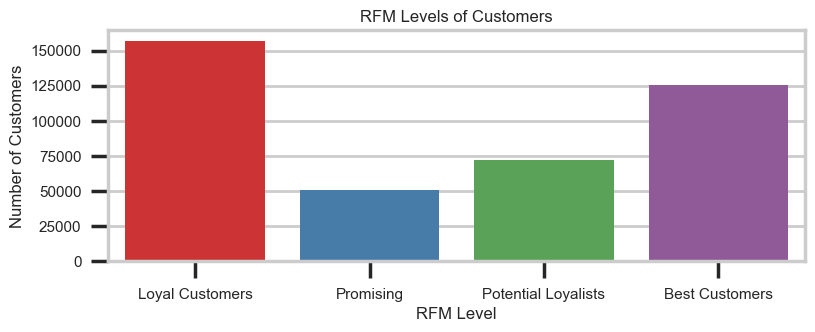

In [42]:
#barplot visualzizing the number of customers per rfm level
plt.figure(figsize=(9,3))
sns.countplot(data = retail, x = 'RFM_Level', palette = 'Set1')

plt.xlabel('RFM Level', fontsize = 12)
plt.ylabel('Number of Customers')
plt.title('RFM Levels of Customers')
plt.show()

In [43]:
#segmenting customers
segmented_customers = retail.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
})

In [44]:
segmented_customers

Recency    Frequency MonetaryValue        
                           mean         mean          mean   count
RFM_Level                                                         
Best Customers         4.432232  1815.432773   5244.151497  125627
Loyal Customers       23.216174   223.244631    614.814420  156832
Potential Loyalists   58.865942    87.589062    245.280141   71894
Promising            146.128263    41.723620    115.478936   50568

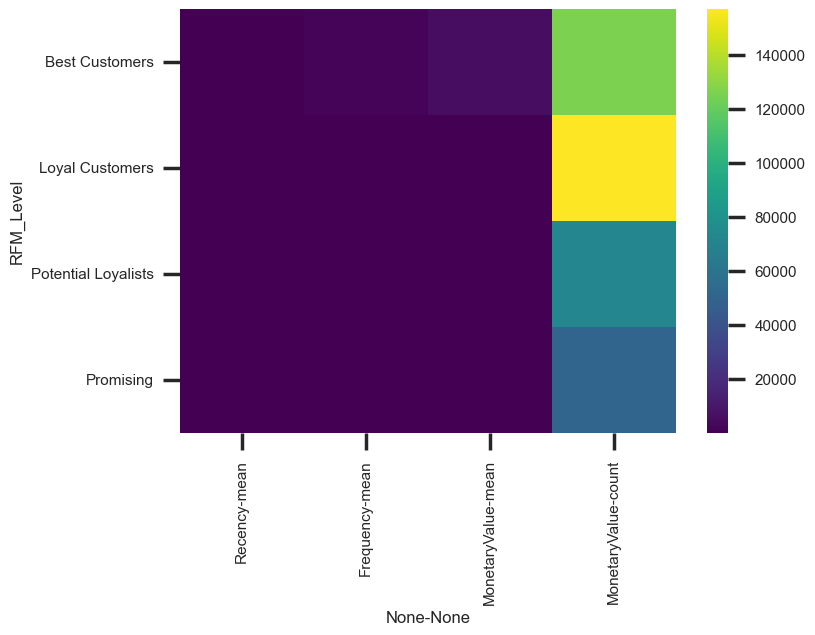

In [45]:
sns.heatmap(segmented_customers, cmap = 'viridis')
plt.show()

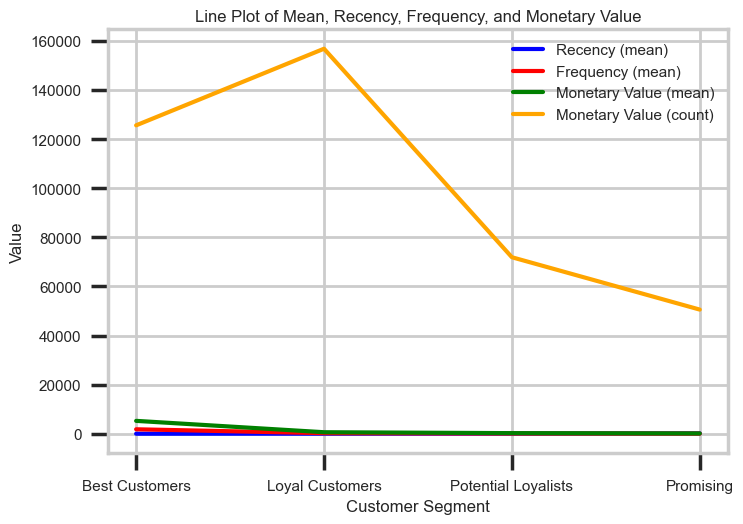

In [46]:
#trying to visualize segmented customers as a line chart

#extracting the columns to plot
recency_mean = segmented_customers.loc[:, ('Recency', 'mean')]
frequency_mean = segmented_customers.loc[:, ('Frequency', 'mean')]
monetary_value_mean = segmented_customers.loc[:, ('MonetaryValue', 'mean')]
monetary_value_count = segmented_customers.loc[:, ('MonetaryValue', 'count')]

#line plits
plt.plot(recency_mean, c = 'blue', label = 'Recency (mean)')
plt.plot(frequency_mean, c = 'red', label = 'Frequency (mean)')
plt.plot(monetary_value_mean, c = 'green', label = 'Monetary Value (mean)')
plt.plot(monetary_value_count, c = 'orange', label = 'Monetary Value (count)')


plt.xlabel('Customer Segment')
plt.ylabel('Value')
plt.title('Line Plot of Mean, Recency, Frequency, and Monetary Value')
plt.legend()
plt.show()

# Clustering products into product categories

In [47]:
# First, download the required NLTK resources
import nltk
import os

# Download punkt and stopwords
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Verify the download was successful and use the correct resource name
import nltk.data
try:
    # The correct path is 'tokenizers/punkt' (not punkt_tab)
    nltk.data.find('tokenizers/punkt')  # Changed from 'tokenizers/punkt_tab'
    print("Punkt tokenizer is available")
except LookupError:
    print("Punkt tokenizer is not available, trying alternative download")
    # Specify a download directory that's in the search path
    nltk.download('punkt', download_dir=os.path.join(os.path.expanduser('~'), 'nltk_data'))

# Now proceed with your original code
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

# Make sure retail dataframe exists
# If retail is not defined, you need to load your data first
# For example: retail = pd.read_csv('your_data.csv')
# Uncomment and modify the line below:
# import pandas as pd
# retail = pd.read_csv('your_data.csv')

# Check if retail dataframe exists and has the Description column
if 'retail' not in locals() or 'Description' not in retail.columns:
    raise ValueError("The retail dataframe is not defined or doesn't have a Description column")

# Tokenize the product descriptions
retail['Tokenized_Description'] = retail['Description'].apply(lambda x: word_tokenize(x) if isinstance(x, str) else [])

# Remove stop words
stop_words = set(stopwords.words('english'))
retail['Tokenized_Description'] = retail['Tokenized_Description'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Perform stemming
stemmer = PorterStemmer()
retail['Tokenized_Description'] = retail['Tokenized_Description'].apply(lambda x: [stemmer.stem(word) for word in x])

# Perform word frequency analysis
retail['Word_Counts'] = retail['Tokenized_Description'].apply(Counter)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Punkt tokenizer is available


In [48]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Frequency,MonetaryValue,RFM_Score,RFM_Level,Tokenized_Description,Word_Counts
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers,"[white, hang, heart, t-light, holder]","{'white': 1, 'hang': 1, 'heart': 1, 't-light':..."
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers,"[white, metal, lantern]","{'white': 1, 'metal': 1, 'lantern': 1}"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers,"[cream, cupid, heart, coat, hanger]","{'cream': 1, 'cupid': 1, 'heart': 1, 'coat': 1..."
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers,"[knit, union, flag, hot, water, bottl]","{'knit': 1, 'union': 1, 'flag': 1, 'hot': 1, '..."
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers,"[red, woolli, hotti, white, heart, .]","{'red': 1, 'woolli': 1, 'hotti': 1, 'white': 1..."


In [49]:
# Perform dimensionality reduction (e.g. using TF-IDF)
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform([' '.join(x) for x in retail['Tokenized_Description']])

### The Elbow Method

The elbow method looks at the relationship between the number of clusters k and the **within-cluster sum of squared distances (WCSS)**, which measures the average distance between each point and its closest centroid. The **WCSS decreases as k increases**, but at some point, the decrease in WCSS will start to level off, forming an "elbow" in the plot of WCSS versus k. The idea behind the elbow method is to choose k at the elbow point, where the decrease in WCSS is the greatest.

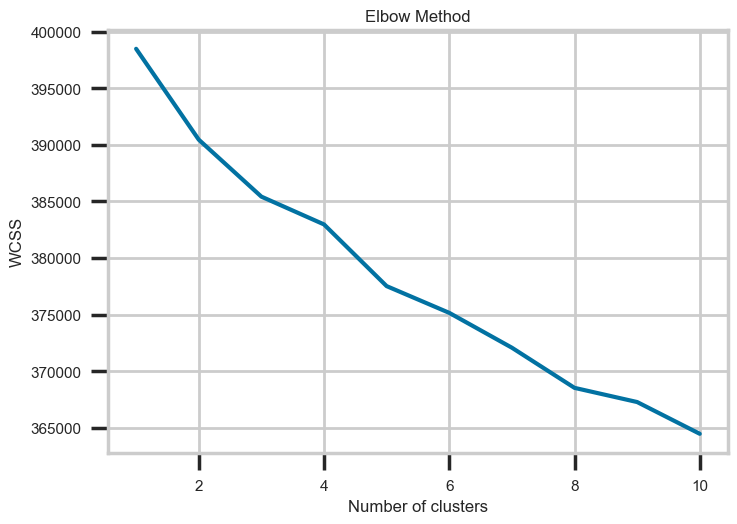

In [50]:
#elbow viz for number of k's
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have a column of clean text:
descriptions = retail['Description'].astype(str)  # ensure all are strings

# Vectorize
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(descriptions)

# Check again
print(type(tfidf_matrix))          # should be <class 'scipy.sparse.csr.csr_matrix'>
print(tfidf_matrix.shape)          # should be (n_samples, n_features)


<class 'scipy.sparse._csr.csr_matrix'>
(404921, 2031)


In [52]:
from scipy.sparse import csr_matrix
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Proper conversion
if isinstance(tfidf_matrix, csr_matrix):
    dense_matrix = tfidf_matrix.toarray()
else:
    dense_matrix = tfidf_matrix

# Check if conversion worked
import numpy as np
print(type(dense_matrix), dense_matrix.shape)
print(dense_matrix.dtype)

# Ensure float type
dense_matrix = np.asarray(dense_matrix, dtype=np.float64)


<class 'numpy.ndarray'> (404921, 2031)
float64


In [53]:
#clustering the reduced features
kmeans = KMeans(n_clusters = 3)
kmeans.fit(tfidf_matrix)
retail['Product_Cluster'] = kmeans.predict(tfidf_matrix)

In [54]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Frequency,MonetaryValue,RFM_Score,RFM_Level,Tokenized_Description,Word_Counts,Product_Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers,"[white, hang, heart, t-light, holder]","{'white': 1, 'hang': 1, 'heart': 1, 't-light':...",0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers,"[white, metal, lantern]","{'white': 1, 'metal': 1, 'lantern': 1}",0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers,"[cream, cupid, heart, coat, hanger]","{'cream': 1, 'cupid': 1, 'heart': 1, 'coat': 1...",2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers,"[knit, union, flag, hot, water, bottl]","{'knit': 1, 'union': 1, 'flag': 1, 'hot': 1, '...",2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers,"[red, woolli, hotti, white, heart, .]","{'red': 1, 'woolli': 1, 'hotti': 1, 'white': 1...",0


### Visualizing the Product Category Clusters

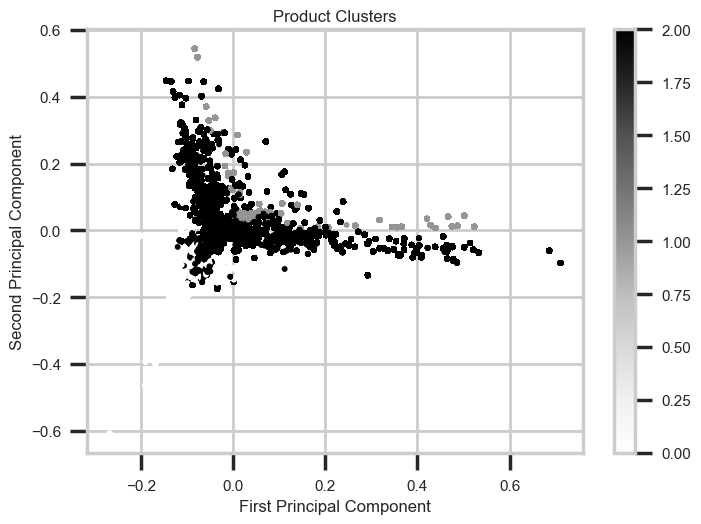

In [55]:
# Apply PCA to the TF-IDF matrix to reduce the dimensionality to 2 components
pca = PCA(n_components=2).fit_transform(tfidf_matrix)

# Create a scatter plot where the x-axis and y-axis represent the first and second principal components
fig, ax = plt.subplots()
scatter = ax.scatter(pca[:,0], pca[:,1], c = retail['Product_Cluster'], s = 5)
ax.set_title('Product Clusters')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
plt.colorbar(scatter)
plt.show()

## Customer Segmentation using Unsupervised Learning

## PCA - Dimensional Reduction

In [56]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404921 entries, 0 to 404920
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   InvoiceNo              404921 non-null  object        
 1   StockCode              404921 non-null  object        
 2   Description            404921 non-null  object        
 3   Quantity               404921 non-null  int64         
 4   InvoiceDate            404921 non-null  datetime64[ns]
 5   UnitPrice              404921 non-null  float64       
 6   CustomerID             404921 non-null  float64       
 7   Country                404921 non-null  object        
 8   Recency                404921 non-null  int64         
 9   Frequency              404921 non-null  int64         
 10  MonetaryValue          404921 non-null  float64       
 11  RFM_Score              404921 non-null  int32         
 12  RFM_Level              404921 non-null  obje

In [57]:
#selecting features
features = ['Quantity', 'UnitPrice', 'Recency', 'Frequency', 'MonetaryValue', 'RFM_Score', 'Product_Cluster']
X = retail[features]

In [58]:
X.shape

(404921, 7)

In [59]:
#scaling data using StandardScaler
scaler = StandardScaler()
retail_scaled = scaler.fit_transform(X)

In [60]:
#applying PCA
pca = PCA(3, svd_solver = 'full')
pca.fit(retail_scaled)
lowdim_retail = pca.transform(retail_scaled)

In [61]:
lowdim_retail

array([[-1.70735032,  1.06793887, -3.49504845],
       [-1.70830502,  1.17716657, -3.41815824],
       [-1.69483751,  2.22157607, -1.69672307],
       ...,
       [-0.52153751, -0.06692935,  0.79033347],
       [-0.52153751, -0.06692935,  0.79033347],
       [-0.52243553,  0.03765251,  0.86372031]])

In [62]:
#creating a dataframe with PCA output
columns = ['pca_comp_%i' % i for i in range(3)]
retail_pca  = pd.DataFrame(lowdim_retail, columns = columns)
retail_pca.head()

,pca_comp_0,pca_comp_1,pca_comp_2
0,-1.707350,1.067939,-3.495048
1,-1.708305,1.177167,-3.418158
2,-1.694838,2.221576,-1.696723
3,-1.695542,2.305908,-1.637824
4,-1.708305,1.177167,-3.418158


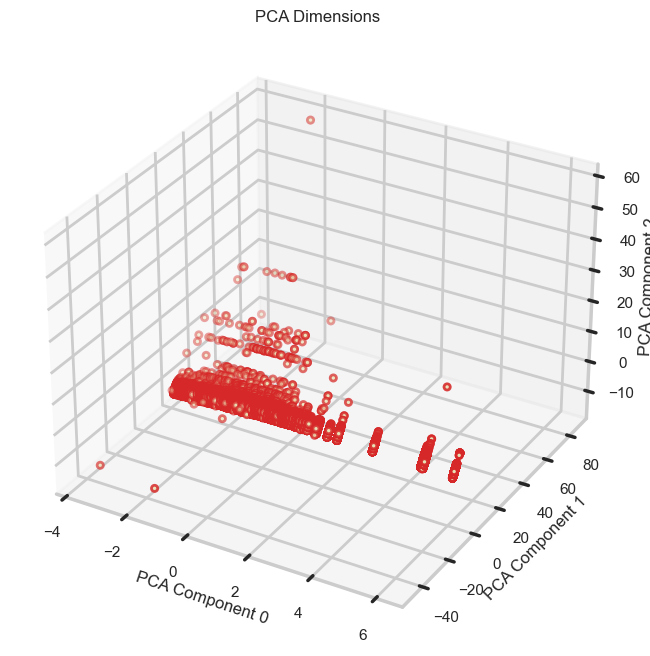

In [63]:
# #visualizing retail_pca in 3D
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(retail_pca['pca_comp_0'], retail_pca['pca_comp_1'], retail_pca['pca_comp_2'], 
           s = 20, c = '#eae2b7', edgecolors = '#d62828')
ax.set_xlabel('PCA Component 0')
ax.set_ylabel('PCA Component 1')
ax.set_zlabel('PCA Component 2')
ax.set_title('PCA Dimensions')
plt.show();

### The Elbow Method for the Customer Segments

Determing k for customer dataset

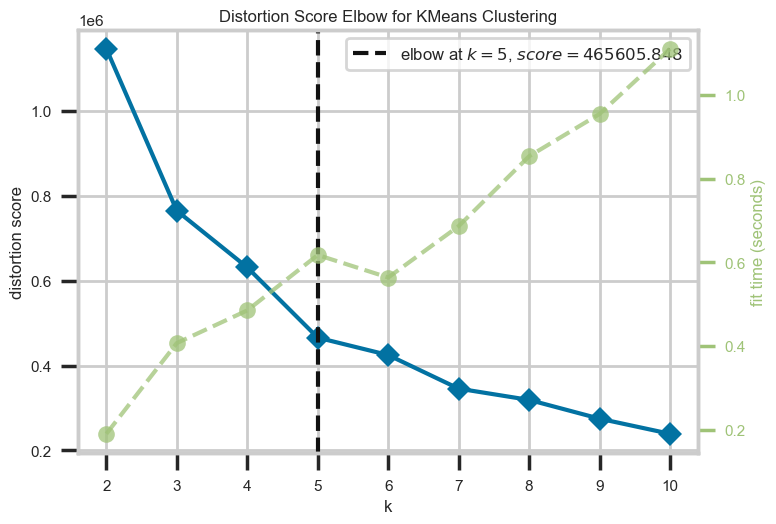

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [64]:
#elbow viz for number of k's
elbow_method = KElbowVisualizer(KMeans(), k = 10)
elbow_method.fit(retail_pca)
elbow_method.show()

### K-Means Clustering

In [65]:
#performing k-means clustering
kmeans = KMeans(n_clusters = 5)
kmeans_pred = kmeans.fit_predict(retail_pca)

In [66]:
# add predicted clusters for each data point into dataframe 
retail['Cluster']= kmeans_pred

# add predicted clusters for each data point into reduced dimension data   
retail_pca['Cluster'] = kmeans_pred

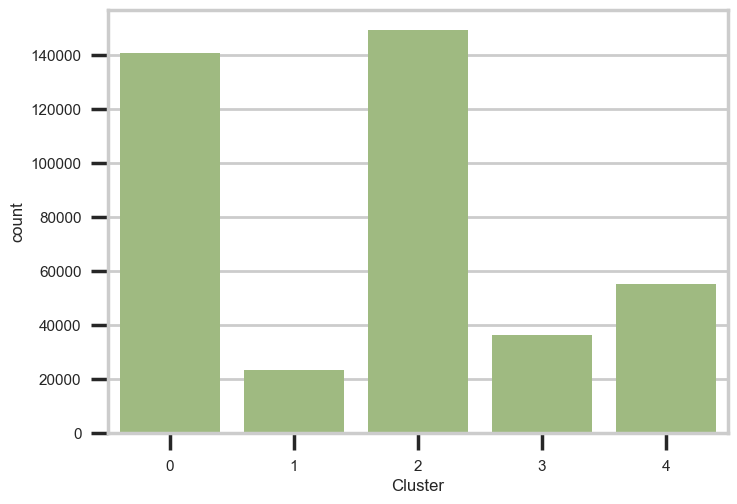

In [68]:
#checking out the count per cluster
sns.countplot(retail_pca, x = 'Cluster')
plt.show()

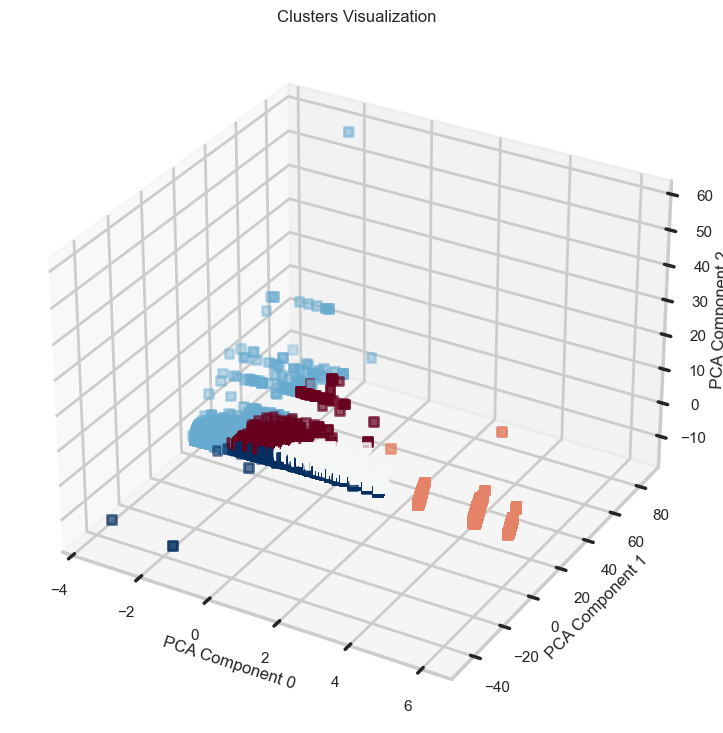

In [69]:
#visualizing clusterd reduced dimension data in 3D
fig = plt.figure(figsize = (12,9))
ax = fig.add_subplot(111, projection='3d')
x = np.array(retail_pca['pca_comp_0'])
y = np.array(retail_pca['pca_comp_1'])
z = np.array(retail_pca['pca_comp_2'])

ax.scatter(x,y,z, marker = 's', c = retail_pca['Cluster'], s = 40, cmap="RdBu")

ax.set_xlabel('PCA Component 0')
ax.set_ylabel('PCA Component 1')
ax.set_zlabel('PCA Component 2')
ax.set_title('Clusters Visualization')
plt.show()

## Understanding clusters

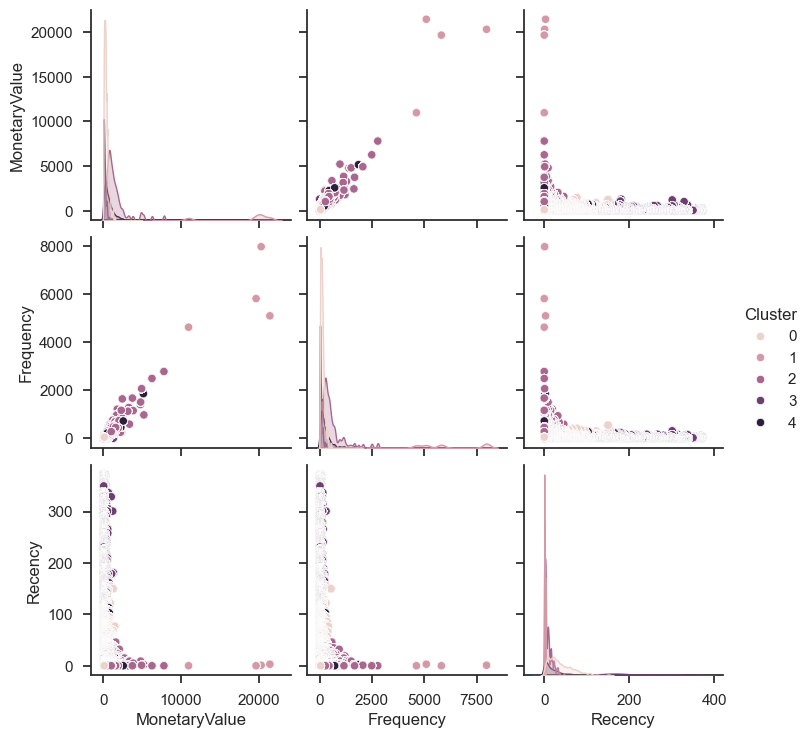

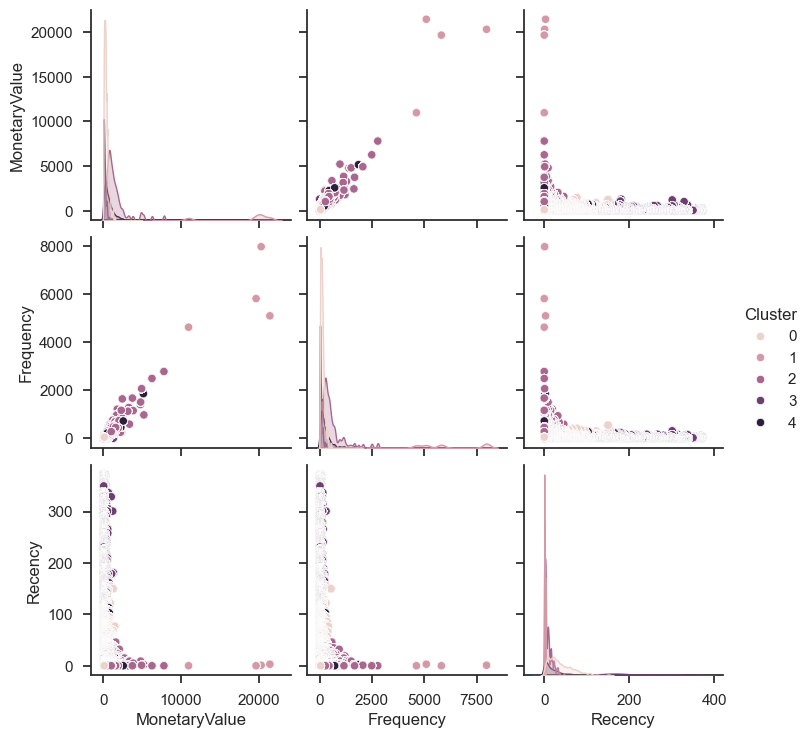

In [71]:
sns.set(style='ticks')
sns.pairplot(retail[['MonetaryValue', 'Frequency', 'Recency', 'Cluster']], hue = 'Cluster')
plt.show()